Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hotel=pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

In [3]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 31 columns

In [5]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Total Cancelled Bookings  

In [6]:
is_canceled=['Not Canceled','Canceled']

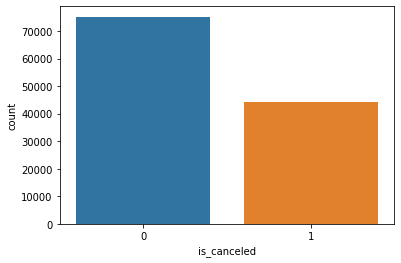

In [7]:
sns.countplot(x='is_canceled',data=hotel)

**Removing the null values**

Percentage of null values in each column

In [8]:
hotel.isnull().sum()*100/len(hotel)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Children - 0.03%

In [9]:
hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [10]:
hotel.corr()['children'].sort_values()

lead_time                        -0.037622
days_in_waiting_list             -0.033273
is_repeated_guest                -0.032859
previous_cancellations           -0.024730
previous_bookings_not_canceled   -0.021072
is_canceled                       0.005048
arrival_date_week_number          0.005518
arrival_date_day_of_month         0.014544
babies                            0.024030
adults                            0.030447
company                           0.030931
agent                             0.041066
stays_in_week_nights              0.044203
stays_in_weekend_nights           0.045793
booking_changes                   0.048949
arrival_date_year                 0.054624
required_car_parking_spaces       0.056253
total_of_special_requests         0.081745
adr                               0.324854
children                          1.000000
Name: children, dtype: float64

In [11]:
hotel[hotel['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Filling null values in column children with 0

In [12]:
hotel['children'].fillna(0,inplace=True)

Company - 94.3% 

In [13]:
hotel['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

More than 90% of missing values in company column

Dropping the column company



In [14]:
hotel.drop('company',axis=1,inplace=True)


Agent - 13.7%

In [15]:
hotel.corr()['agent'].sort_values()

is_canceled                      -0.083114
lead_time                        -0.069741
days_in_waiting_list             -0.055151
adults                           -0.035594
arrival_date_week_number         -0.031201
adr                              -0.024695
previous_cancellations           -0.012488
arrival_date_day_of_month         0.001487
previous_bookings_not_canceled    0.023252
is_repeated_guest                 0.031527
total_of_special_requests         0.034162
babies                            0.036184
children                          0.041070
arrival_date_year                 0.063457
booking_changes                   0.067010
stays_in_weekend_nights           0.140739
required_car_parking_spaces       0.177353
stays_in_week_nights              0.182382
agent                             1.000000
Name: agent, dtype: float64

In [16]:
hotel['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [17]:
hotel['agent'].isnull().sum()

16340

Filling null values in agent column

In [18]:
hotel['agent'].fillna(hotel['agent'].value_counts().index[0],limit=int(16340/4),inplace=True)
hotel['agent'].fillna(hotel['agent'].value_counts().index[1],limit=int(16340/4),inplace=True)
hotel['agent'].fillna(hotel['agent'].value_counts().index[2],limit=int(16340/4),inplace=True)
hotel['agent'].fillna(hotel['agent'].value_counts().index[3],limit=int(16340/4),inplace=True)

In [19]:
hotel['agent'].value_counts()

9.0      36046
240.0    18007
1.0      11276
14.0      7725
7.0       3539
         ...  
433.0        1
291.0        1
213.0        1
367.0        1
388.0        1
Name: agent, Length: 333, dtype: int64

Country - 0.4%

In [20]:
hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PYF        1
MMR        1
SMR        1
CYM        1
MDG        1
Name: country, Length: 177, dtype: int64

In [21]:
hotel[hotel['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,9.0,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,9.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,9.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,9.0,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,9.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,1.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,1.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,1.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


Dropping the rows with null values

In [22]:
hotel.dropna(inplace=True)

In [23]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [24]:
hotel['meal'].value_counts()

BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

Replacing undefined with SC

In [25]:
hotel["meal"].replace("Undefined", "SC", inplace=True)

In [26]:
hotel['market_segment'].value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Replacing undefined with Online TA 

In [27]:
hotel["market_segment"].replace("Undefined","Online TA",inplace=True)

In [28]:
hotel['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Replacing undefined with TA/TO

In [29]:
hotel['distribution_channel'].replace("Undefined","TA/TO",inplace=True)

In [30]:
hotel['is_canceled'].value_counts()

0    74745
1    44157
Name: is_canceled, dtype: int64

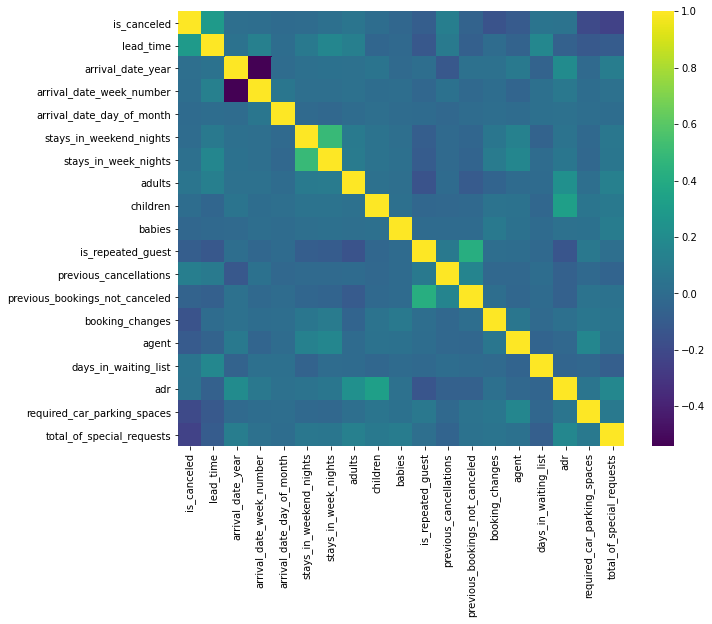

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(hotel.corr(),cmap='viridis')

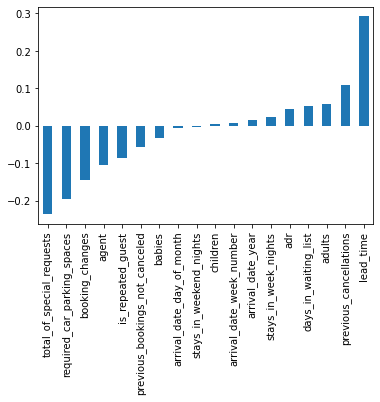

In [32]:
hotel.corr()['is_canceled'].sort_values().drop('is_canceled').plot.bar()

In [33]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Exploring each column

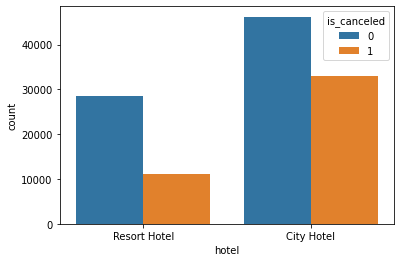

In [34]:
sns.countplot(x='hotel',hue='is_canceled',data=hotel)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


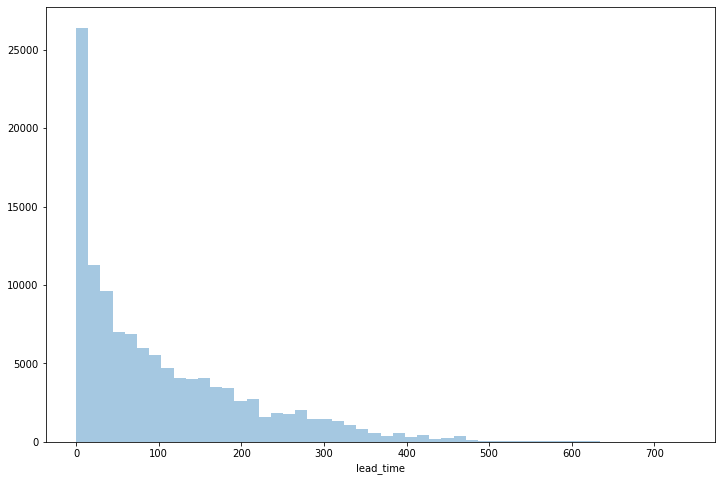

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(hotel['lead_time'],kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


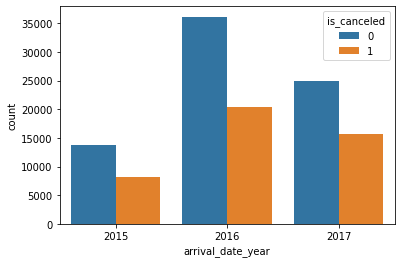

In [36]:
sns.countplot(hotel['arrival_date_year'],hue=hotel['is_canceled'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


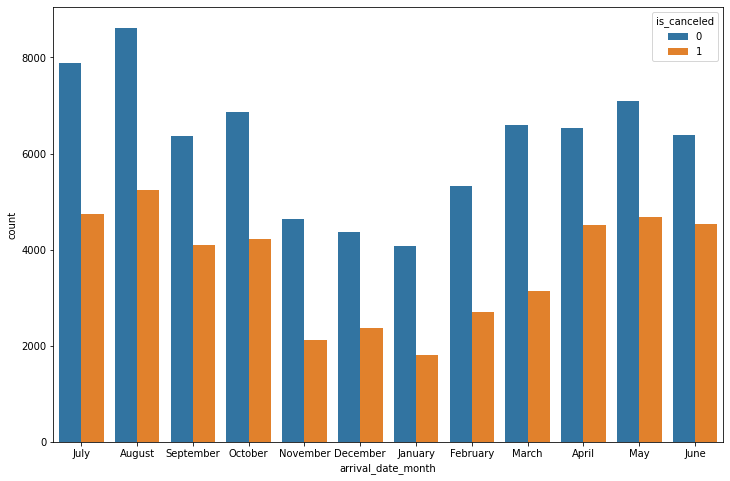

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(hotel['arrival_date_month'],hue=hotel['is_canceled'])

The most number of bookings occurred in the month of August whereby the least number of bookings is in January

Number of Cancellations Per Month

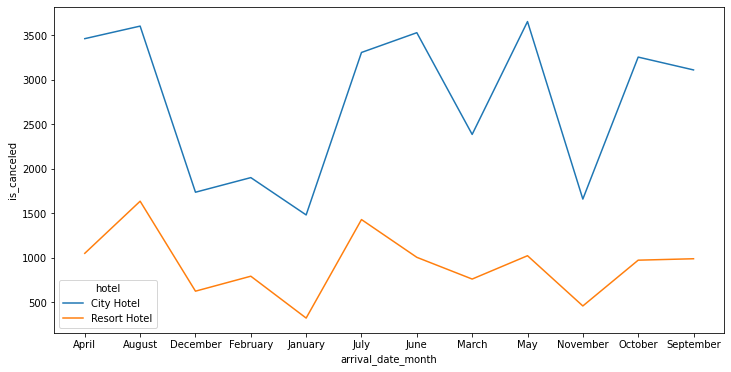

In [38]:
plt.figure(figsize=(12,6))
cancellations= hotel[hotel['is_canceled']==1].groupby(['arrival_date_month','hotel']).count()
sns.lineplot(x='arrival_date_month',y='is_canceled',data=cancellations,hue='hotel')

August gets the highest number of cancellations

Text(0.5, 0, 'arrival date week')

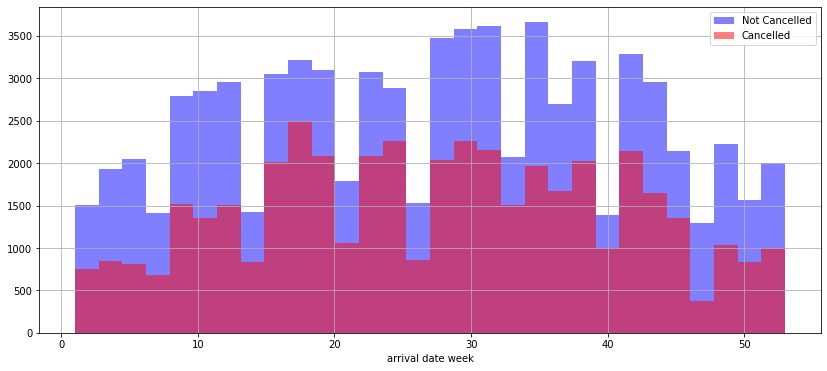

In [39]:
plt.figure(figsize=(14,6))
hotel[hotel['is_canceled']==0]['arrival_date_week_number'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Not Cancelled')
hotel[hotel['is_canceled']==1]['arrival_date_week_number'].hist(alpha=0.5,color='red',
                                              bins=30,label='Cancelled')
plt.legend()
plt.xlabel('arrival date week')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


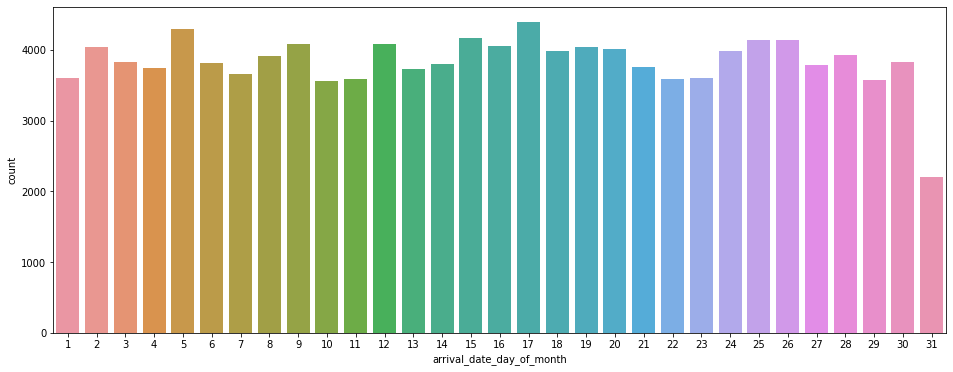

In [40]:
plt.figure(figsize=(16,6))
sns.countplot(hotel['arrival_date_day_of_month'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


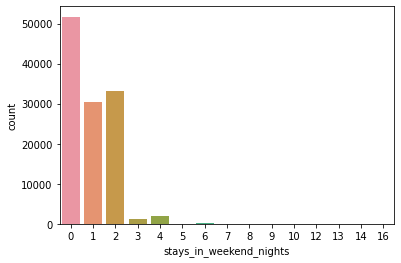

In [41]:
sns.countplot(hotel['stays_in_weekend_nights'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


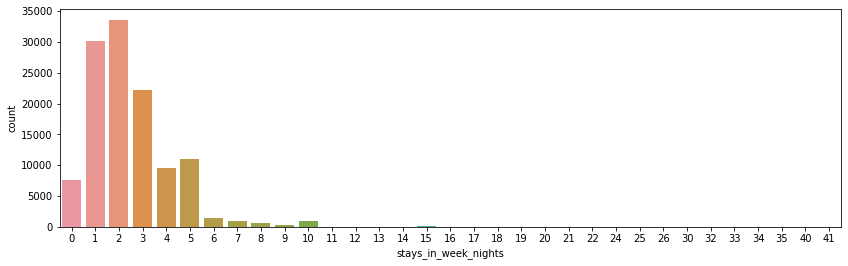

In [42]:
plt.figure(figsize=(14,4))
sns.countplot(hotel['stays_in_week_nights'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


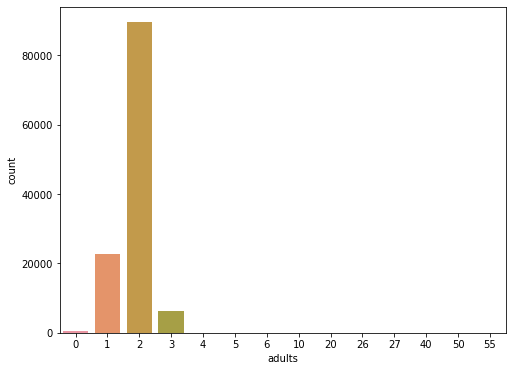

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(hotel['adults'])

Most of the bookings are for 0 to 4 adults

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


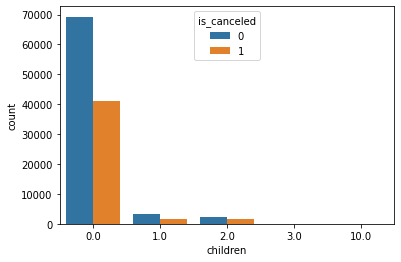

In [44]:
sns.countplot(hotel['children'],hue=hotel['is_canceled'])

Guests with 2 children are more likely to cancel their reservation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


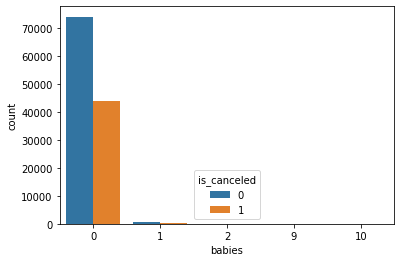

In [45]:
sns.countplot(hotel['babies'],hue=hotel['is_canceled'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


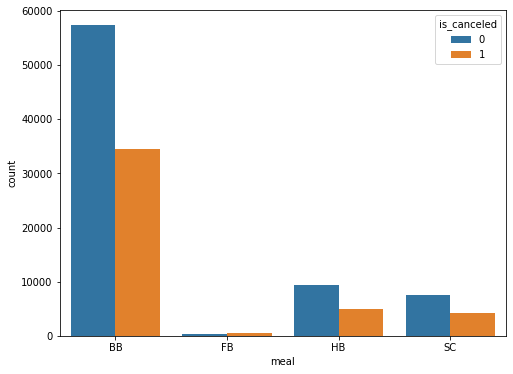

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(hotel['meal'],hue=hotel['is_canceled'])

Guests opting FB are likely to get cancel their reservation

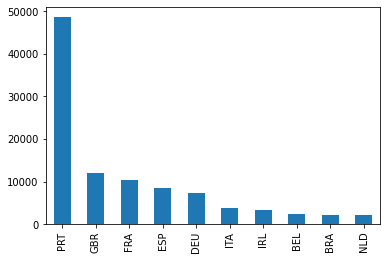

In [47]:
hotel['country'].value_counts()[:10].plot(kind='bar')

Top 10 countries with max number of bookings

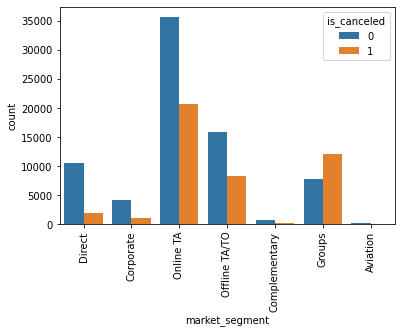

In [48]:
plt.xticks(rotation=90)
sns.countplot(x='market_segment',hue='is_canceled',data=hotel)

Groups bookings are most likely to be canceled. Complementary and direct bookings are least likely to be canceled

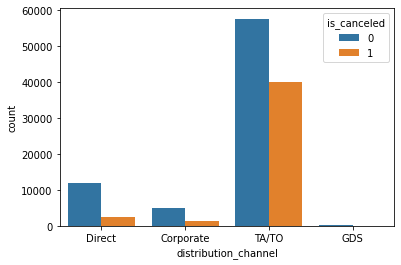

In [49]:
sns.countplot(x='distribution_channel',hue='is_canceled',data=hotel)

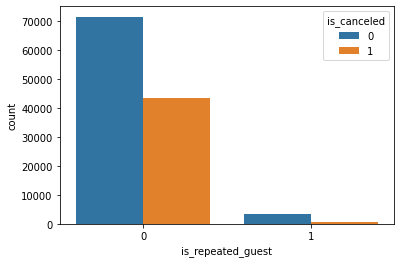

In [50]:
sns.countplot(x='is_repeated_guest',hue='is_canceled',data=hotel)

Repeated guests are less likely to cancel their reservation

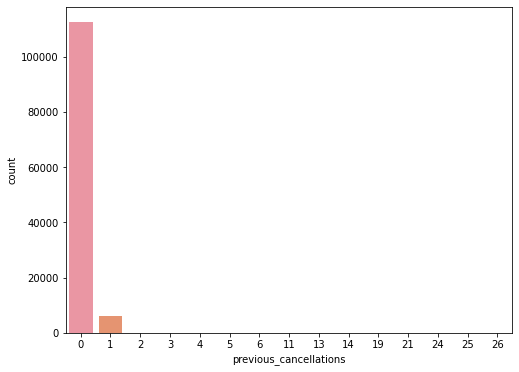

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='previous_cancellations',data=hotel)

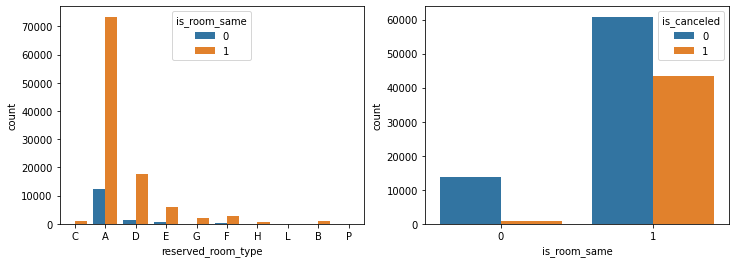

In [52]:
fig , axi = plt.subplots(1,2,figsize=(12,4))
hotel['is_room_same']= hotel[['reserved_room_type','assigned_room_type']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)
sns.countplot(x='reserved_room_type',hue='is_room_same',data=hotel,ax=axi[0])
sns.countplot(x='is_room_same',hue='is_canceled',data=hotel,ax=axi[1])

Most of the reservations are for type A. Strangely if the reserved room type is same as the assigned room type then chances of booking getting canceled are higher

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


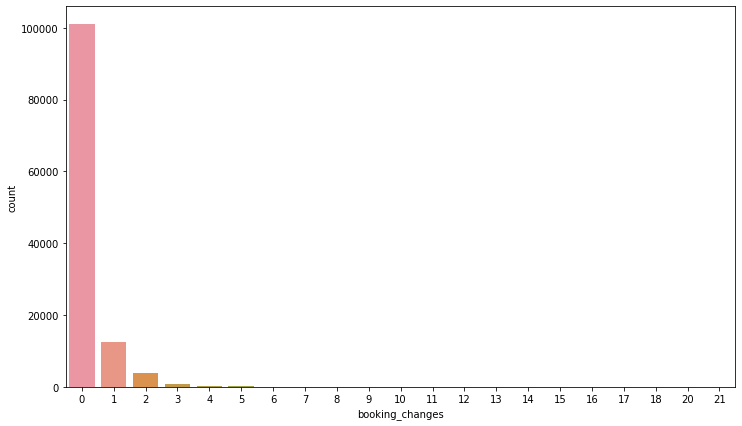

In [53]:
plt.figure(figsize=(12,7))
sns.countplot('booking_changes',data=hotel)

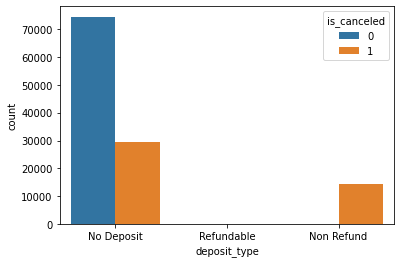

In [54]:
plt.figure()
sns.countplot(x='deposit_type',hue='is_canceled',data=hotel)

Least number of booking are with refundable deposit type and they are least likely to be canceled. Bookings with Non Refundable deposit type are most likely to be canceled.


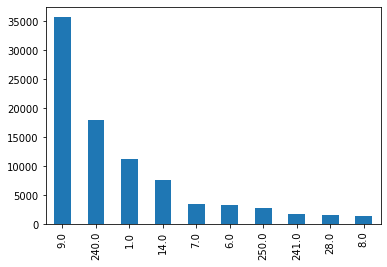

In [55]:
hotel['agent'].value_counts().iloc[:10].plot(kind='bar')

Top 10 agents with max number of bookings

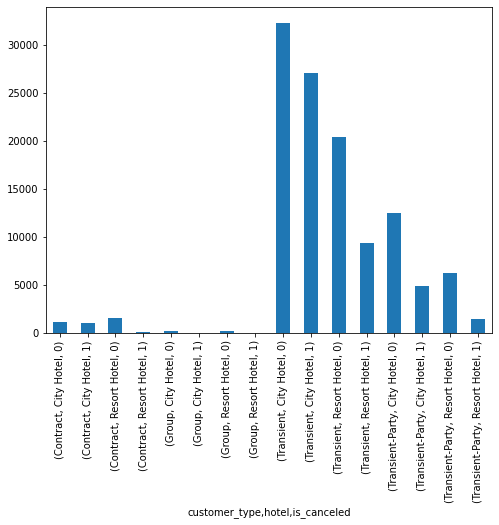

In [56]:
cancellation_per_type=hotel.groupby(['customer_type','hotel','is_canceled']).count()['reservation_status']
cancellation_per_type.plot(kind='bar',figsize=(8,6))

Count of canceled bookings for each hotel for each customer type

Maximum count of canceled bookings belong to Transient customer type

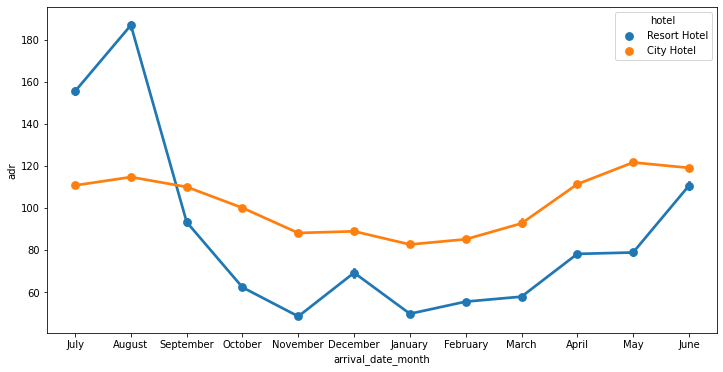

In [57]:
plt.figure(figsize=(12,6))
sns.pointplot(data=hotel,x='arrival_date_month',y='adr',hue='hotel')

Average daily rate follows the number of bookings per month with the highest adr in August and lowest in January

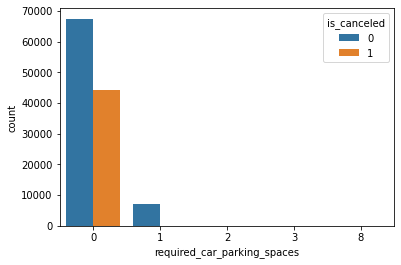

In [58]:
sns.countplot(x='required_car_parking_spaces',hue='is_canceled',data=hotel)

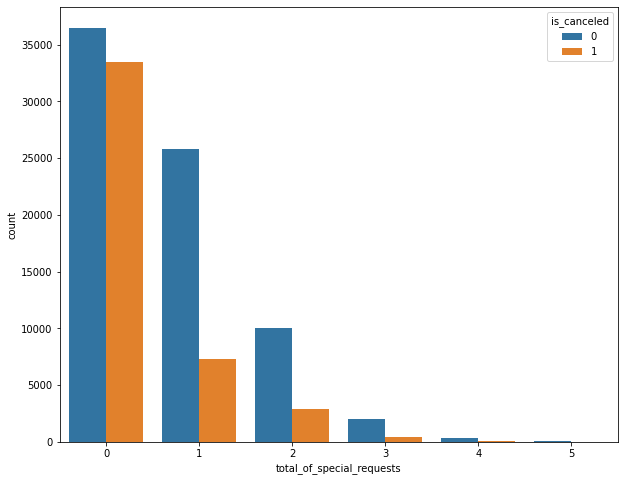

In [59]:
plt.figure(figsize=(10,8))
sns.countplot(x='total_of_special_requests',data=hotel,hue='is_canceled')

**Feature Selection**

In [60]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Dropping irrelevent features

In [61]:
X=hotel.drop(['arrival_date_month','arrival_date_day_of_month','reservation_status','stays_in_weekend_nights','reservation_status_date','previous_bookings_not_canceled','is_canceled'],axis=1)
y=hotel['is_canceled']

In [62]:
numerical_feat= X.select_dtypes(include=['int64', 'float64']).columns
categorical_feat=X.select_dtypes('object').columns
label_encoder={}
scaler=StandardScaler()
X[numerical_feat]=scaler.fit_transform(X[numerical_feat])
for i,feature in enumerate(categorical_feat):
  label_encoder[i]=LabelEncoder()
  X[feature]=label_encoder[i].fit_transform(X[feature])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Percentage of canceled bookings in train set: 0.37046846756376783
Percentage of canceled bookings in test set: 0.37320964371272747 



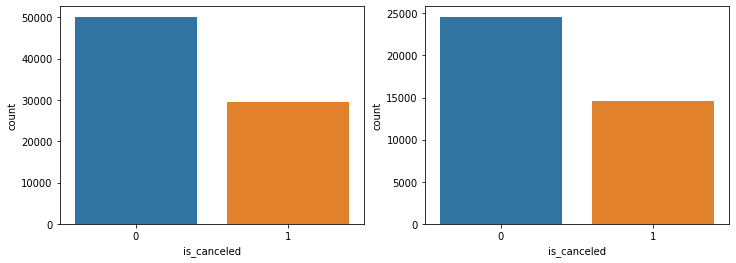

In [65]:
print("Percentage of canceled bookings in train set:",len(y_train[y_train==1])/len(y_train))
print("Percentage of canceled bookings in test set:",len(y_test[y_test==1])/len(y_test),"\n")
fig , axi = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x=y_train,ax=axi[0])
sns.countplot(x=y_test,ax=axi[1])


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

5 classification algorithms are used to predict hotel cancellations


*   KNeighborsClassifier
*   AdaBoostClassifier
*   GradientBoostingClassifier
*   DecisionTreeClassifier 
*   RandomForestClassifier






In [67]:
classifiers = [
    KNeighborsClassifier(6),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100)
    ]

In [68]:
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  print(classifier)
  print("Model Score:", classifier.score(X_test,y_test))
  print("")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Model Score: 0.8425251032162699

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Model Score: 0.8379377134410521

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                       

Highest model score 0.896 is obtained from RandomForestClassifier

In [69]:
tree=RandomForestClassifier(n_estimators=100)
tree.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<BarContainer object of 25 artists>

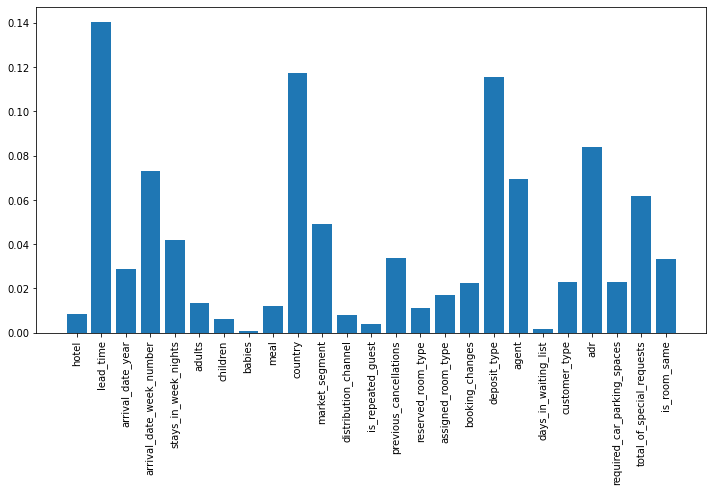

In [70]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
importance=tree.feature_importances_
plt.bar(X.columns,importance) 

The top features affecting hotel cancellations:


*   lead_time
*   country
*   deposit_type
*   adr



Test Input

In [71]:
test=[['City Hotel',50,2017,27,5,2,2,0,'SC','PRT','Online TA','TA/TO',0,0,'H','H',0,'No Deposit',240,0,'Transient',163,0,4,1]]
test=pd.DataFrame(test,columns=X.columns)

In [72]:
test[numerical_feat]=scaler.transform(test[numerical_feat])
for i,feature in enumerate(categorical_feat):
  test[feature]=label_encoder[i].transform(test[feature])

In [73]:
for i in tree.predict(test):
  print(is_canceled[i])


Not Canceled
